## Importing Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Data Pre Processing

In [61]:
main_data = pd.read_csv('glass source classification dataset.csv', index_col = 'Unnamed: 0')
impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
impute.fit(main_data[['Ca']])
main_data['Ca'] = impute.transform(main_data[['Ca']])
main_data['Ba'] = main_data['Ba'].map({'Does not exist':0, 'exists':1})
main_data['Fe'] = main_data['Fe'].map({'Does not exist':0, 'exists':1})
enc = LabelEncoder()
main_data['Type'] = enc.fit_transform(main_data['Type'])
label_data = main_data[['Type']]
temp_data = main_data.drop(['Type'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(temp_data)
data_scaled = scaler.transform(temp_data)
feature_data = pd.DataFrame(data = data_scaled, columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])

## Train Test Split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, random_state = 1, test_size = 0.2, stratify = label_data)

## Using Support Vector Machine (SVM)

In [64]:
svc = SVC(kernel = "linear")
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
svc_full = accuracy_score(y_test, predictions) * 100
print(f'Accuracy of Support Vector Machine (SVM): {svc_full}%')

Accuracy of Support Vector Machine (SVM): 81.3953488372093%


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Using Neural Network (Multilayer Perceptron Classifier)

In [67]:
nnc = MLPClassifier(hidden_layer_sizes = (7), activation = "relu", max_iter = 3000)
nnc.fit(x_train, y_train)
predictions = nnc.predict(x_test)
nnc_full = accuracy_score(y_test, predictions) * 100
print(f'Accuracy of Neural Network (Multilayer Perceptron Classifier): {nnc_full}%')

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Neural Network (Multilayer Perceptron Classifier): 88.37209302325581%


## Using Random Forest

In [68]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
rfc_full = accuracy_score(y_test, predictions) * 100
print(f'Accuracy of Random Forest: {rfc_full}%')

<ipython-input-68-f633103f077a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Accuracy of Random Forest: 83.72093023255815%


## Dimensionality Reduction

In [87]:
pca = PCA (n_components = (feature_data.shape[1]//2))
principal_components = pca.fit_transform(feature_data)
reduced_data = pd.DataFrame(data = principal_components)

## Train Test Split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(reduced_data, label_data, random_state = 1, test_size = 0.2, stratify = label_data)

## Using Support Vector Machine (SVM)

In [71]:
svc = SVC(kernel = "linear")
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
svc_half = accuracy_score(y_test, predictions) * 100
print(f'Accuracy of Support Vector Machine (SVM): {svc_half}%')

Accuracy of Support Vector Machine (SVM): 81.3953488372093%


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Using Neural Network (Multilayer Perceptron Classifier)

In [72]:
nnc = MLPClassifier(hidden_layer_sizes = (7), activation = "relu", max_iter = 3000)
nnc.fit(x_train, y_train)
predictions = nnc.predict(x_test)
nnc_half = accuracy_score(y_test, predictions)*100
print(f'Accuracy of Neural Network (Multilayer Perceptron Classifier): {nnc_half}%')

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Neural Network (Multilayer Perceptron Classifier): 86.04651162790698%


## Using Random Forest

In [73]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
rfc_half = accuracy_score(y_test, predictions)*100
print(f'Accuracy of Random Forest: {rfc_half}%')

<ipython-input-73-0ad7b860f38b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Accuracy of Random Forest: 88.37209302325581%


## Bar Chart Comparison

Text(0.5, 1.0, 'Accuracy Percentage for Full Data')

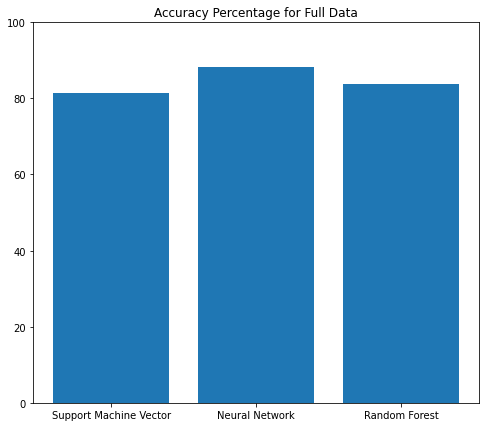

In [83]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_ylim([0, 100])
ax.bar(['Support Machine Vector', 'Neural Network', 'Random Forest'], [svc_full, nnc_full, rfc_full], color = 'C0')
ax.set_title("Accuracy Percentage for Full Data")

Text(0.5, 1.0, 'Accuracy Percentage for Reduced Data')

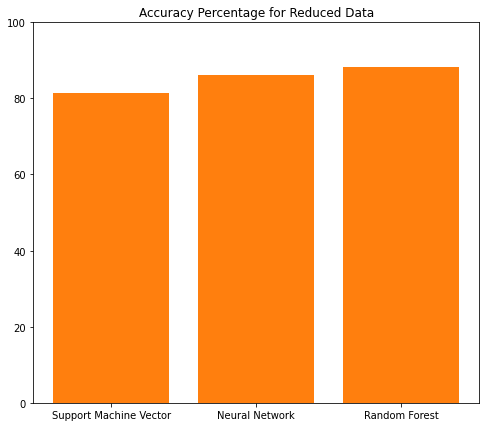

In [82]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_ylim([0, 100])
ax.bar(['Support Machine Vector', 'Neural Network', 'Random Forest'], [svc_half, nnc_half, rfc_half], color = 'C1')
ax.set_title("Accuracy Percentage for Reduced Data")

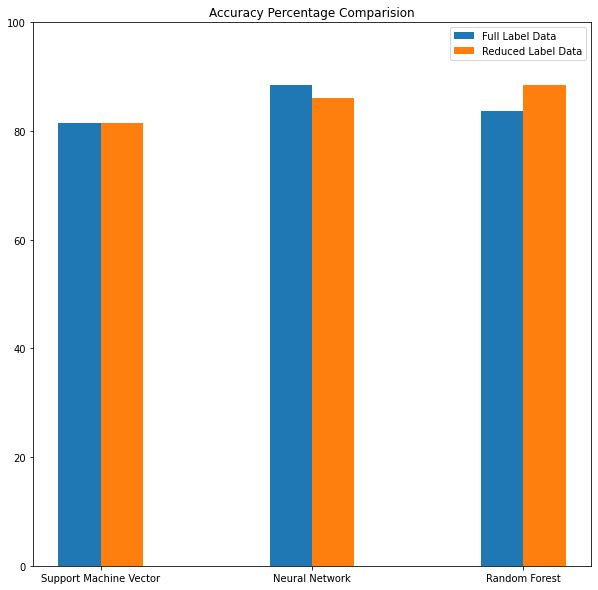

In [86]:
plt.figure(num=None, figsize=(10, 10))
y = np.arange(3)
plt.bar(y - 0.1, [svc_full, nnc_full, rfc_full], width=0.2, color = 'C0')
plt.bar(y + 0.1, [svc_half, nnc_half, rfc_half], width=0.2, color = 'C1')
plt.xticks(y, ['Support Machine Vector', 'Neural Network', 'Random Forest'])
plt.ylim((0, 100))
plt.legend(('Full Label Data','Reduced Label Data'))
plt.title("Accuracy Percentage Comparision")
plt.show()